In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
print(matplotilb.__version__)

NameError: name 'matplotilb' is not defined

# 데이터 불러오기

In [2]:
df = pd.read_excel("데이터분석프로젝트_VER2_210329_210926.xlsx")

In [3]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

# 결측치 처리

In [5]:
# 필요없는 tax_free_amount 열 삭제

df.pop('tax_free_amount')

0         110500.0
1         116000.0
2         190900.0
3         190900.0
4         117500.0
            ...   
105414    116000.0
105415    189000.0
105416    116000.0
105417    189000.0
105418    169000.0
Name: tax_free_amount, Length: 105419, dtype: float64

In [6]:
# 무시해도 되는 값 삭제

df = df.query('(type != "ORDER") & (type != "TRANSACTION") & (state != "PENDING") & (state != "CANCELLED") & (state != "HIDDEN") & (state != "DELETED")')

In [7]:
# 잘 삭제되었는지 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56738 entries, 2 to 105418
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      56738 non-null  int64         
 1   customer_id             56738 non-null  float64       
 2   course_id               54582 non-null  float64       
 3   type                    56738 non-null  object        
 4   state                   56738 non-null  object        
 5   course_title            56737 non-null  object        
 6   category_title          56734 non-null  object        
 7   format                  56737 non-null  object        
 8   completed_at            56738 non-null  datetime64[ns]
 9   transaction_amount      56738 non-null  int64         
 10  coupon_title            23763 non-null  object        
 11  coupon_discount_amount  23763 non-null  float64       
 12  sale_price              55658 non-null  float

In [8]:
# course_id 채우기

df = df.fillna({'course_id':111111})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56738 entries, 2 to 105418
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      56738 non-null  int64         
 1   customer_id             56738 non-null  float64       
 2   course_id               56738 non-null  float64       
 3   type                    56738 non-null  object        
 4   state                   56738 non-null  object        
 5   course_title            56737 non-null  object        
 6   category_title          56734 non-null  object        
 7   format                  56737 non-null  object        
 8   completed_at            56738 non-null  datetime64[ns]
 9   transaction_amount      56738 non-null  int64         
 10  coupon_title            23763 non-null  object        
 11  coupon_discount_amount  23763 non-null  float64       
 12  sale_price              55658 non-null  float

# 구매한 월/요일/시간대별 분석

## 월별 분석

In [10]:
df_complete = df.copy()[['id','customer_id','course_id','type','state','course_title','category_title','format','transaction_amount','coupon_title','coupon_discount_amount','sale_price','completed_at']]

In [11]:
df_complete.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,transaction_amount,coupon_title,coupon_discount_amount,sale_price,completed_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,2021-03-28 15:21:43
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,2021-03-28 15:21:54
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,2021-03-28 15:26:47
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,263000,NaN,NaN,263000.0,2021-03-28 15:27:17
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,2021-03-28 15:31:01


In [12]:
# '월' 기준
def month(x):
    if x==1:
        return '1'
    elif x==2:
        return '2'
    elif x==3:
        return '3'
    elif x==4:
        return '4'
    elif x==5:
        return '5'
    elif x==6:
        return '6'
    elif x==7:
        return '7'
    elif x==8:
        return '8'
    elif x==9:
        return '9'
    elif x==10:
        return '10'
    elif x==11:
        return '11'   
    else:
        return '12'
df_complete['completed_at_month'] = df_complete.completed_at.dt.month.map(month)

In [13]:
df_complete.completed_at_month.value_counts()

5    10067
8    10038
4     9659
6     9445
7     8919
9     6244
3     2366
Name: completed_at_month, dtype: int64

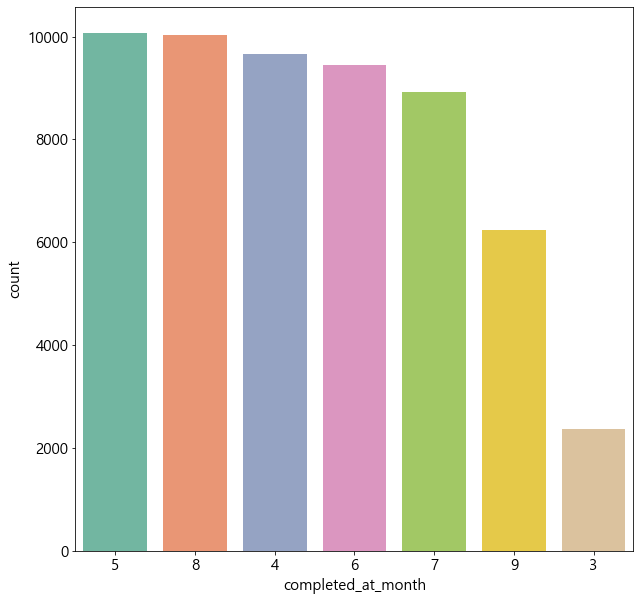

In [14]:
parameters = {'xtick.labelsize':15,
             'ytick.labelsize':15,
             'axes.labelsize':15}
plt.rcParams.update(parameters)

plt.figure(figsize=(10,10))
sns.countplot(data=df_complete, x='completed_at_month', order=df_complete['completed_at_month'].value_counts().index ,palette='Set2')
plt.show()

In [15]:
# 월별 환불/결제 수
pivot_month = df_complete.pivot_table(index=['completed_at_month','type'], values='transaction_amount', aggfunc=('count'))
pivot_month

transaction_amount
completed_at_month type                       
3                  PAYMENT                2275
                   REFUND                   91
4                  PAYMENT                8980
                   REFUND                  679
5                  PAYMENT                9490
                   REFUND                  577
6                  PAYMENT                8919
                   REFUND                  526
7                  PAYMENT                8230
                   REFUND                  689
8                  PAYMENT                9270
                   REFUND                  768
9                  PAYMENT                5752
                   REFUND                  492

In [16]:
# 월별 환불 비율

groupby_month = df_complete.groupby(['completed_at_month','type'])['transaction_amount'].count() / df_complete.groupby(['completed_at_month'])['transaction_amount'].count()
groupby_month

completed_at_month  type   
3                   PAYMENT    0.961538
                    REFUND     0.038462
4                   PAYMENT    0.929703
                    REFUND     0.070297
5                   PAYMENT    0.942684
                    REFUND     0.057316
6                   PAYMENT    0.944309
                    REFUND     0.055691
7                   PAYMENT    0.922749
                    REFUND     0.077251
8                   PAYMENT    0.923491
                    REFUND     0.076509
9                   PAYMENT    0.921204
                    REFUND     0.078796
Name: transaction_amount, dtype: float64

In [17]:
m_payment_value=[]
m_refund_value=[]
m_labels = ['3','4','5','6','7','8','9']

for idx in range(0,len(groupby_month),2):
    m_payment_value.append(groupby_month.iloc[idx])

for idx in range(1,len(groupby_month),2):
    m_refund_value.append(groupby_month.iloc[idx])
    
print(m_payment_value)
print(m_refund_value)


[0.9615384615384616, 0.9297028677916969, 0.942684017085527, 0.9443091582848068, 0.9227491871286019, 0.9234907352062164, 0.9212043561819346]
[0.038461538461538464, 0.07029713220830314, 0.05731598291447303, 0.05569084171519322, 0.07725081287139814, 0.07650926479378362, 0.07879564381806534]


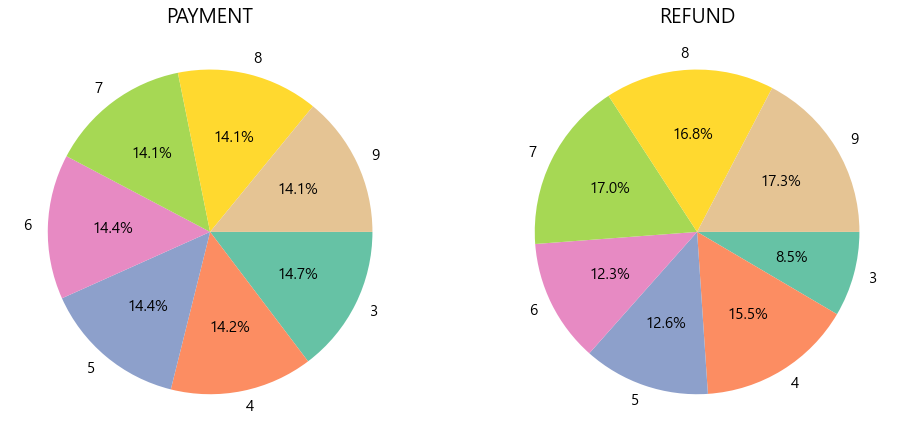

In [18]:
colors = sns.color_palette('Set2')

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.title('PAYMENT', fontsize=20)
plt.pie(m_payment_value, labels=m_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':15})

plt.subplot(1,2,2)
plt.title('REFUND', fontsize=20)
plt.pie(m_refund_value, labels=m_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':15})

plt.show()

In [19]:
# 월별 쿠폰사용량
def coupon(x):
    if x == True:
        return 1
    else:
        return 0
df_complete['is_coupon'] = df_complete['coupon_title'].notnull().map(coupon)
df_complete.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,transaction_amount,coupon_title,coupon_discount_amount,sale_price,completed_at,completed_at_month,is_coupon
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,2021-03-28 15:21:43,3,1
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,2021-03-28 15:21:54,3,1
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,2021-03-28 15:26:47,3,1
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,263000,NaN,NaN,263000.0,2021-03-28 15:27:17,3,0
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,2021-03-28 15:31:01,3,1


In [20]:
pivot_m_coupon = df_complete.pivot_table(index=['completed_at_month','is_coupon'], values='transaction_amount', aggfunc=('count'))
pivot_m_coupon

transaction_amount
completed_at_month is_coupon                    
3                  0                         766
                   1                        1600
4                  0                        4462
                   1                        5197
5                  0                        5645
                   1                        4422
6                  0                        7357
                   1                        2088
7                  0                        6336
                   1                        2583
8                  0                        5250
                   1                        4788
9                  0                        3159
                   1                        3085

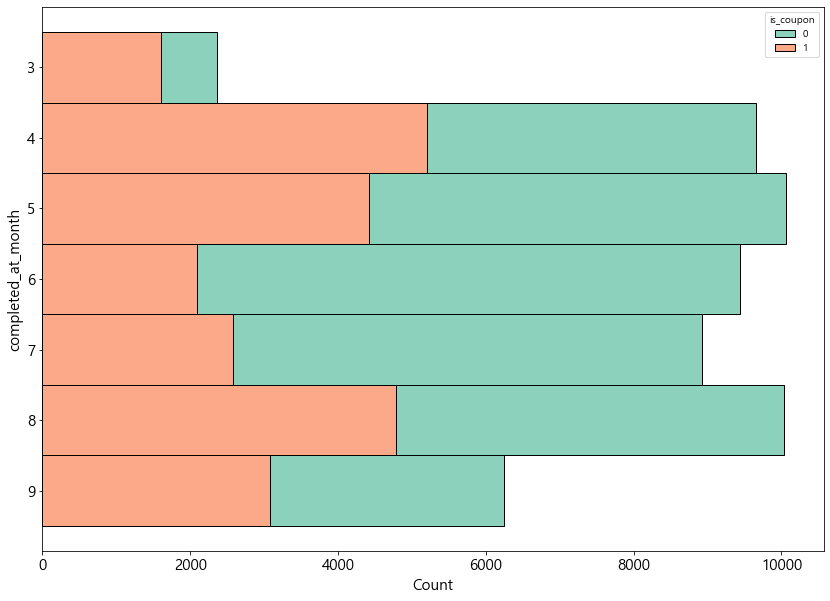

In [21]:
# groupby_coupon.plot(figsize=(20,10), kind='barh', stacked=True, fontsize=16)

plt.figure(figsize=(14,10))
sns.histplot(data=df_complete, y='completed_at_month', hue='is_coupon', multiple='stack', palette='Set2')
plt.show()

In [22]:
# 월별 쿠폰사용비율

groupby_m_coupon = df_complete.groupby(['completed_at_month','is_coupon'])['transaction_amount'].count()/df_complete.groupby(['completed_at_month'])['transaction_amount'].count()
groupby_m_coupon

completed_at_month  is_coupon
3                   0            0.323753
                    1            0.676247
4                   0            0.461953
                    1            0.538047
5                   0            0.560743
                    1            0.439257
6                   0            0.778931
                    1            0.221069
7                   0            0.710394
                    1            0.289606
8                   0            0.523013
                    1            0.476987
9                   0            0.505926
                    1            0.494074
Name: transaction_amount, dtype: float64

In [23]:
m_no_coupon_value=[]
m_use_coupon_value=[]

for idx in range(0,len(groupby_m_coupon),2):
    m_no_coupon_value.append(groupby_m_coupon.iloc[idx])

for idx in range(1,len(groupby_m_coupon),2):
    m_use_coupon_value.append(groupby_m_coupon[idx])

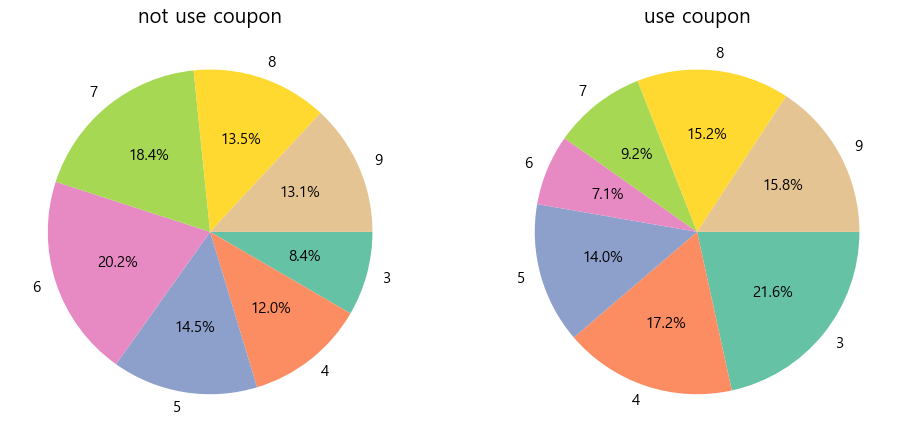

In [24]:
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.title('not use coupon', fontsize=20)
plt.pie(m_no_coupon_value, labels=m_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':15})

plt.subplot(1,2,2)
plt.title('use coupon', fontsize=20)
plt.pie(m_use_coupon_value, labels=m_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':15})

plt.show()

In [25]:
# 총 판매금액
df_complete.pivot_table(index='completed_at_month', values='transaction_amount', aggfunc='sum')

,transaction_amount
completed_at_month,
3,221407144
4,1270307751
5,1129846933
6,1338262670
7,1549957390
8,1468471087
9,1036354182


## 요일별 분석

In [26]:
def day(x):
    if x== 0:
        return '월요일'
    elif x==1:
        return '화요일'
    elif x==2:
        return '수요일'
    elif x==3:
        return '목요일'
    elif x==4:
        return '금요일'
    elif x==5:
        return '토요일'
    elif x==6:
        return '일요일'
df_complete['completed_at_day'] = df_complete['completed_at'].dt.day_of_week.map(day)
df_complete.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,transaction_amount,coupon_title,coupon_discount_amount,sale_price,completed_at,completed_at_month,is_coupon,completed_at_day
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,2021-03-28 15:21:43,3,1,일요일
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,2021-03-28 15:21:54,3,1,일요일
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,2021-03-28 15:26:47,3,1,일요일
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,263000,NaN,NaN,263000.0,2021-03-28 15:27:17,3,0,일요일
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,2021-03-28 15:31:01,3,1,일요일


In [27]:
df_complete['completed_at_day'].value_counts()

월요일    10632
화요일     8710
수요일     8705
금요일     8666
일요일     7668
목요일     7259
토요일     5098
Name: completed_at_day, dtype: int64

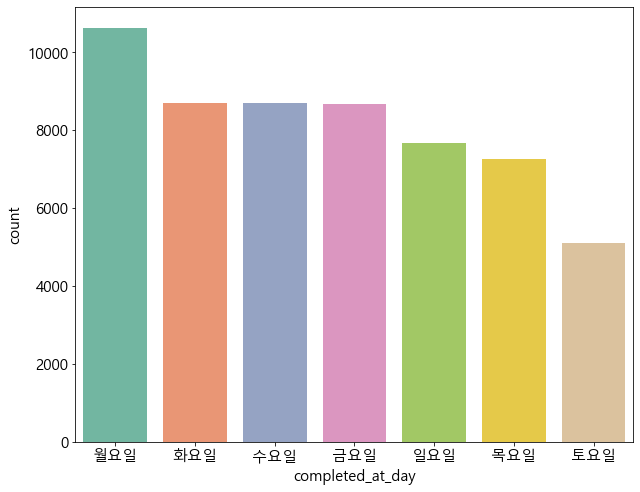

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_complete, x='completed_at_day', order=df_complete['completed_at_day'].value_counts().index, palette='Set2')
plt.show()

In [29]:
pivot_d_coupon = df_complete.pivot_table(index=['completed_at_day','is_coupon'], values='transaction_amount', aggfunc=('count'))
pivot_d_coupon

transaction_amount
completed_at_day is_coupon                    
금요일              0                        4605
                 1                        4061
목요일              0                        4480
                 1                        2779
수요일              0                        5545
                 1                        3160
월요일              0                        5453
                 1                        5179
일요일              0                        4555
                 1                        3113
토요일              0                        3126
                 1                        1972
화요일              0                        5211
                 1                        3499

In [30]:
groupby_d_coupon = df_complete.groupby(['completed_at_day','is_coupon'])['transaction_amount'].count()/df_complete.groupby(['completed_at_day'])['transaction_amount'].count()
groupby_d_coupon

completed_at_day  is_coupon
금요일               0            0.531387
                  1            0.468613
목요일               0            0.617165
                  1            0.382835
수요일               0            0.636990
                  1            0.363010
월요일               0            0.512886
                  1            0.487114
일요일               0            0.594027
                  1            0.405973
토요일               0            0.613182
                  1            0.386818
화요일               0            0.598278
                  1            0.401722
Name: transaction_amount, dtype: float64

In [31]:
d_no_coupon_value=[]
d_use_coupon_value=[]
d_labels=['금요일','목요일','수요일','월요일','일요일','토요일','화요일']

for idx in range(0,len(groupby_d_coupon),2):
    d_no_coupon_value.append(groupby_d_coupon.iloc[idx])

for idx in range(1,len(groupby_d_coupon),2):
    d_use_coupon_value.append(groupby_d_coupon[idx])
    
print(d_no_coupon_value)
print(d_use_coupon_value)

[0.5313870297715209, 0.6171648987463838, 0.6369902354968409, 0.5128856282919488, 0.5940271257172666, 0.6131816398587682, 0.5982778415614236]
[0.4686129702284791, 0.3828351012536162, 0.3630097645031591, 0.48711437170805116, 0.40597287428273343, 0.38681836014123183, 0.40172215843857634]


In [32]:
d_coupon_rate = pd.DataFrame((zip(d_labels, d_no_coupon_value, d_use_coupon_value)), columns=['day','not use coupon','use coupon'])
d_coupon_rate

,day,not use coupon,use coupon
0,금요일,0.531387,0.468613
1,목요일,0.617165,0.382835
2,수요일,0.636990,0.363010
3,월요일,0.512886,0.487114
4,일요일,0.594027,0.405973
5,토요일,0.613182,0.386818
6,화요일,0.598278,0.401722


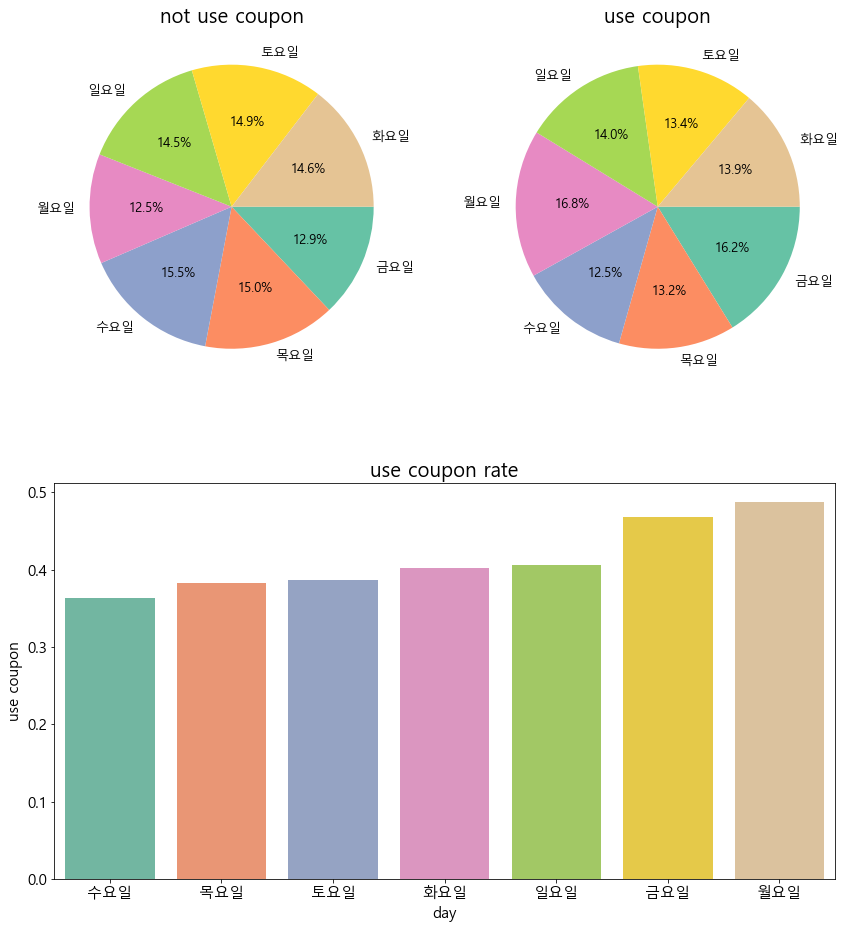

In [33]:
plt.figure(figsize=(14,16))
plt.subplot(2,2,1)
plt.title('not use coupon', fontsize=20)
plt.pie(d_no_coupon_value, labels=d_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':13})

plt.subplot(2,2,2)
plt.title('use coupon', fontsize=20)
plt.pie(d_use_coupon_value, labels=d_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':13})

plt.subplot(2,1,2)
plt.title('use coupon rate', fontsize=20)
sns.barplot(data=d_coupon_rate, x='day', y='use coupon', palette='Set2', order=d_coupon_rate.sort_values('use coupon').day)


plt.show()

In [34]:
# 총 판매금액

df_complete.pivot_table(index='completed_at_day', values='transaction_amount', aggfunc='sum')

,transaction_amount
completed_at_day,
금요일,1201727995
목요일,1130637176
수요일,1376879908
월요일,1183770165
일요일,1157663115
토요일,744263545
화요일,1219665253


## 시간대별 분석

In [35]:
def hour(x):
    if x==1:
        return '1'
    elif x==2:
        return '2'
    elif x==3:
        return '3'
    elif x==4:
        return '4'
    elif x==5:
        return '5'
    elif x==6:
        return '6'
    elif x==7:
        return '7'
    elif x==8:
        return '8'
    elif x==9:
        return '9'
    elif x==10:
        return '10'
    elif x==11:
        return '11'   
    elif x==12:
        return '12'
    elif x==13:
        return '13'
    elif x==14:
        return '14'
    elif x==15:
        return '15'
    elif x==16:
        return '16'
    elif x==17:
        return '17'
    elif x==18:
        return '18'
    elif x==19:
        return '19'
    elif x==20:
        return '20'
    elif x==21:
        return '21'  
    elif x==22:
        return '22'  
    elif x==23:
        return '23'  
    else:
        return '0'
df_complete['completed_at_hour'] = df_complete.completed_at.dt.hour.map(hour)
df_complete.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,transaction_amount,coupon_title,coupon_discount_amount,sale_price,completed_at,completed_at_month,is_coupon,completed_at_day,completed_at_hour
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,2021-03-28 15:21:43,3,1,일요일,15
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,2021-03-28 15:21:54,3,1,일요일,15
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,2021-03-28 15:26:47,3,1,일요일,15
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,263000,NaN,NaN,263000.0,2021-03-28 15:27:17,3,0,일요일,15
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,2021-03-28 15:31:01,3,1,일요일,15


In [36]:
df_complete.completed_at_hour.value_counts()

23    4183
22    3890
15    3838
10    3821
16    3627
13    3486
14    3452
11    3425
17    3392
21    3391
18    3346
20    2912
19    2734
12    2363
0     1862
9     1840
8     1159
1     1117
2      759
7      754
6      433
3      405
5      287
4      262
Name: completed_at_hour, dtype: int64

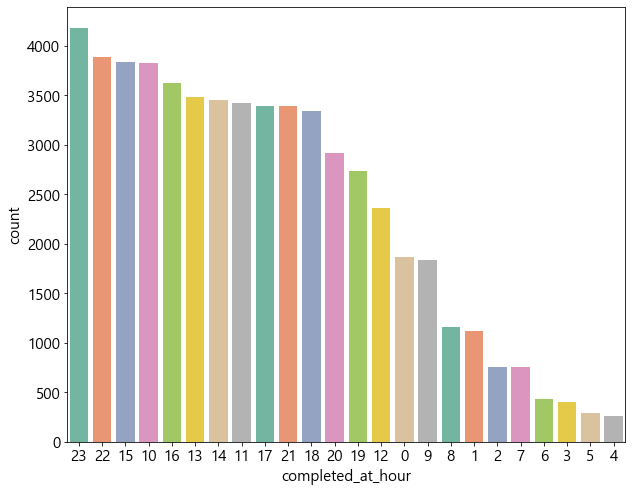

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_complete, x='completed_at_hour', order=df_complete['completed_at_hour'].value_counts().index, palette='Set2')
plt.show()

In [38]:
# 시간대별 쿠폰사용 유무

pivot_h_coupon = df_complete.pivot_table(index=['completed_at_hour','is_coupon'], values='transaction_amount', aggfunc=('count'))
pivot_h_coupon

transaction_amount
completed_at_hour is_coupon                    
0                 0                        1007
                  1                         855
1                 0                         608
                  1                         509
10                0                        2326
                  1                        1495
11                0                        2203
                  1                        1222
12                0                        1319
                  1                        1044
13                0                        2164
                  1                        1322
14                0                        2138
                  1                        1314
15                0                        2404
                  1                        1434
16                0                        2191
                  1                        1436
17                0                        2041
                  1                        1351
18                0                        1988
                  1                        1358
19                0                        1541
                  1                        1193
2                 0                         458
                  1                         301
20                0                        1615
                  1                        1297
21                0                        1744
                  1                        1647
22                0                        2079
                  1                        1811
23                0                        2179
                  1                        2004
3                 0                         242
                  1                         163
4                 0                         153
                  1                         109
5                 0                         168
                  1                         119
6                 0                         267
                  1                         166
7                 0                         438
                  1                         316
8                 0                         644
                  1                         515
9                 0                        1058
                  1                         782

In [39]:
# 시간대별 쿠폰사용비율

groupby_h_coupon = df_complete.groupby(['completed_at_hour','is_coupon'])['transaction_amount'].count()/df_complete.groupby(['completed_at_hour'])['transaction_amount'].count()
groupby_h_coupon

completed_at_hour  is_coupon
0                  0            0.540816
                   1            0.459184
1                  0            0.544315
                   1            0.455685
10                 0            0.608741
                   1            0.391259
11                 0            0.643212
                   1            0.356788
12                 0            0.558189
                   1            0.441811
13                 0            0.620769
                   1            0.379231
14                 0            0.619351
                   1            0.380649
15                 0            0.626368
                   1            0.373632
16                 0            0.604081
                   1            0.395919
17                 0            0.601710
                   1            0.398290
18                 0            0.594142
                   1            0.405858
19                 0            0.563643
                   1        

In [40]:
h_no_coupon_value=[]
h_use_coupon_value=[]
h_labels=['0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','3','4','5','6','7','8','9']

for idx in range(0,len(groupby_h_coupon),2):
    h_no_coupon_value.append(groupby_h_coupon.iloc[idx])

for idx in range(1,len(groupby_h_coupon),2):
    h_use_coupon_value.append(groupby_h_coupon[idx])
    
print(h_no_coupon_value)
print(h_use_coupon_value)

[0.5408163265306123, 0.5443151298119964, 0.6087411672337084, 0.6432116788321168, 0.5581887431231486, 0.6207687894434882, 0.619351100811124, 0.6263678999478896, 0.6040805073063138, 0.6017099056603774, 0.5941422594142259, 0.563643013899049, 0.6034255599472991, 0.5546016483516484, 0.5143025656148629, 0.5344473007712083, 0.5209180014343773, 0.5975308641975309, 0.583969465648855, 0.5853658536585366, 0.6166281755196305, 0.5809018567639257, 0.5556514236410699, 0.575]
[0.45918367346938777, 0.4556848701880036, 0.39125883276629153, 0.3567883211678832, 0.44181125687685147, 0.37923121055651177, 0.380648899188876, 0.37363210005211045, 0.39591949269368626, 0.39829009433962265, 0.40585774058577406, 0.43635698610095097, 0.3965744400527009, 0.4453983516483517, 0.48569743438513713, 0.4655526992287918, 0.4790819985656228, 0.4024691358024691, 0.41603053435114506, 0.4146341463414634, 0.3833718244803695, 0.41909814323607425, 0.4443485763589301, 0.425]


In [41]:
h_coupon_rate = pd.DataFrame((zip(h_labels, h_no_coupon_value, h_use_coupon_value)), columns=['hour','not use coupon','use coupon'])
h_coupon_rate

,hour,not use coupon,use coupon
0,0,0.540816,0.459184
1,1,0.544315,0.455685
2,10,0.608741,0.391259
3,11,0.643212,0.356788
4,12,0.558189,0.441811
5,13,0.620769,0.379231
6,14,0.619351,0.380649
7,15,0.626368,0.373632
8,16,0.604081,0.395919
9,17,0.601710,0.398290


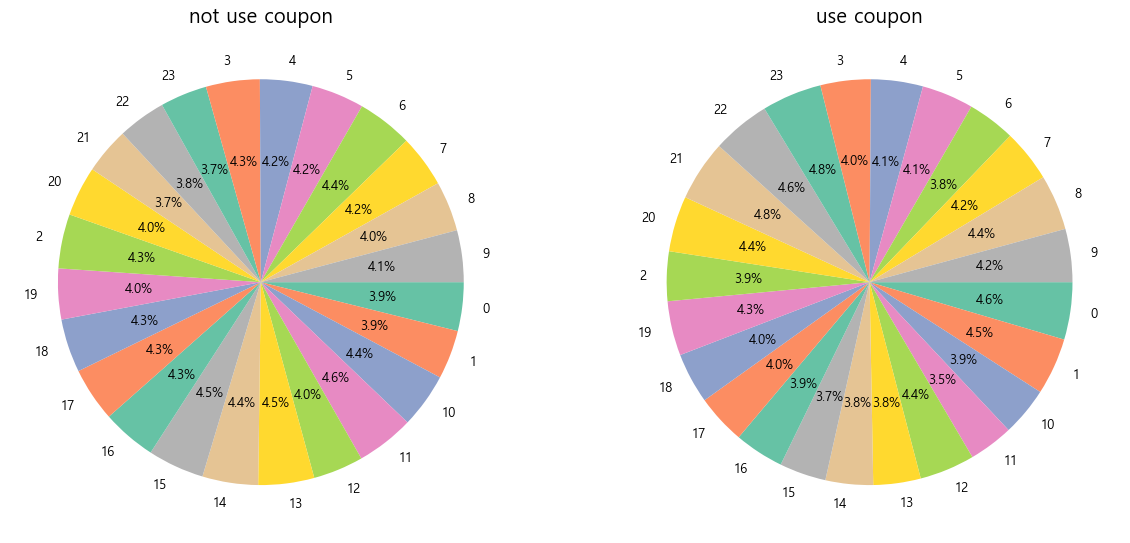

In [42]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title('not use coupon', fontsize=20)
plt.pie(h_no_coupon_value, labels=h_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':13})

plt.subplot(1,2,2)
plt.title('use coupon', fontsize=20)
plt.pie(h_use_coupon_value, labels=h_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':13})

plt.show()

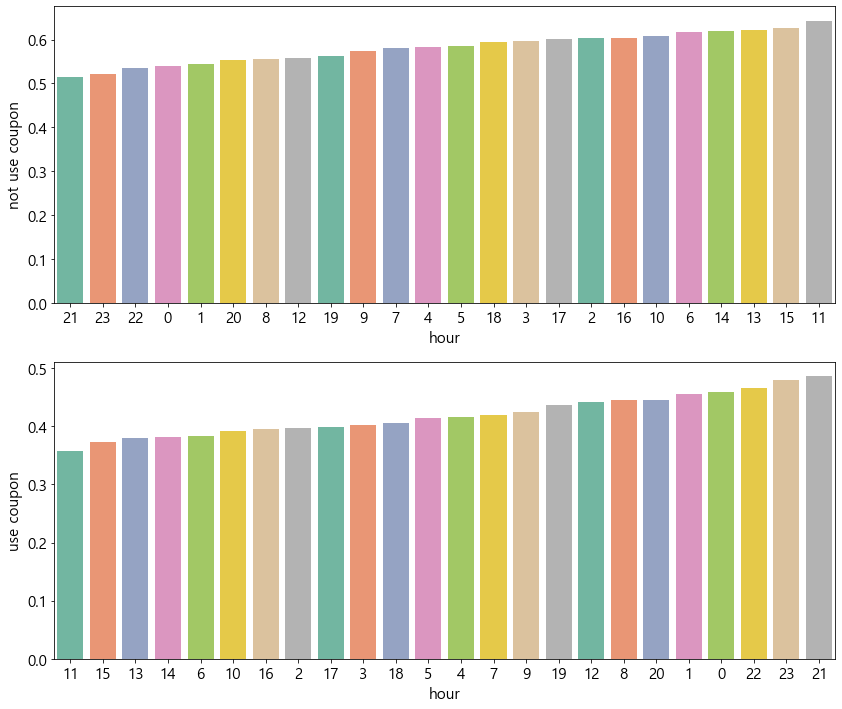

In [43]:
plt.figure(figsize=(14,12))
plt.subplot(2,1,1)
sns.barplot(data=h_coupon_rate, x='hour', y='not use coupon', palette='Set2', order=h_coupon_rate.sort_values('not use coupon').hour)

plt.subplot(2,1,2)
sns.barplot(data=h_coupon_rate, x='hour', y='use coupon', palette='Set2',order=h_coupon_rate.sort_values('use coupon').hour)

plt.show()

In [44]:
# 총 판매금액

df2 = df_complete.pivot_table(index='completed_at_hour', values='transaction_amount', aggfunc='sum')
df2

,transaction_amount
completed_at_hour,
0,241871073
1,139545550
10,297892385
11,320754241
12,371238878
13,366239490
14,618952145
15,953598041
16,568903970


<AxesSubplot:xlabel='completed_at_hour'>

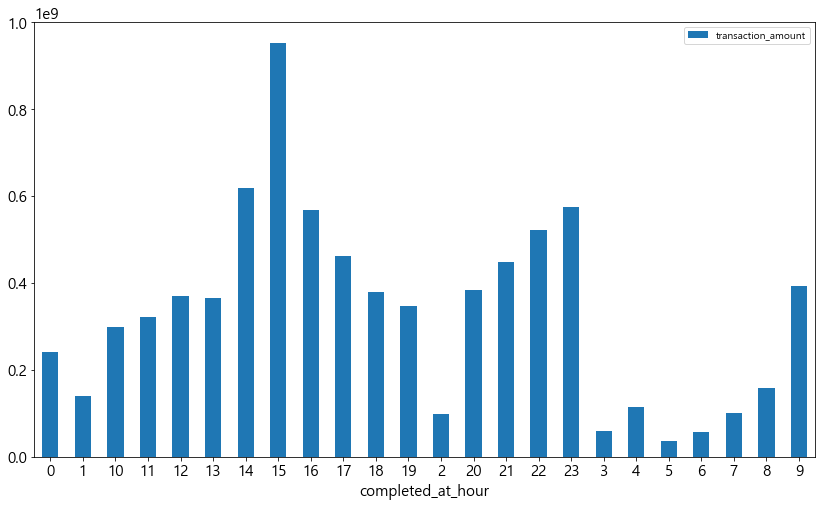

In [45]:
df2.plot(kind='bar', figsize=(14,8), sort_columns=True, rot=0)

## 기업강의

In [46]:
df_complete.format.value_counts()

올인원        46554
RED         3383
온라인 완주반     1673
하루10분컷      1371
스쿨          1036
B2B 온라인      984
스쿨 온라인       643
B2B          485
B2G          434
이벤트           89
아카이브          35
캠프            25
MBA           23
관리             1
온라인            1
Name: format, dtype: int64

In [47]:
df_complete.pivot_table(index='format', values='transaction_amount', aggfunc='sum')

,transaction_amount
format,
B2B,752727790
B2B 온라인,1228768319
B2G,28921300
MBA,4970000
RED,481432363
관리,150000
스쿨,-1285346
스쿨 온라인,38529132
아카이브,1895700


In [48]:
df_complete[ (df_complete.format == 'B2B 온라인') | (df_complete.format == 'B2B')]['completed_at_month'].value_counts()

7    393
8    355
6    226
4    219
9    135
5    107
3     34
Name: completed_at_month, dtype: int64

In [61]:
df_complete['completed_at_day'].value_counts()

월요일    10632
화요일     8710
수요일     8705
금요일     8666
일요일     7668
목요일     7259
토요일     5098
Name: completed_at_day, dtype: int64

In [49]:
df_complete[ (df_complete.format == 'B2B 온라인') | (df_complete.format == 'B2B')]['completed_at_day'].value_counts()

수요일    441
월요일    264
목요일    249
금요일    244
화요일    242
일요일     15
토요일     14
Name: completed_at_day, dtype: int64

In [50]:
df_complete[ (df_complete.format == 'B2B 온라인') | (df_complete.format == 'B2B')]['completed_at_hour'].value_counts()

15    408
16    136
14    133
11    115
13    111
17    107
10    100
18     66
12     59
9      46
19     39
22     29
20     28
21     25
23     16
1      11
0      10
8       9
2       5
7       5
5       4
4       3
6       2
3       2
Name: completed_at_hour, dtype: int64

## 패키지 판매

In [166]:
df_complete[df_complete.course_title.str.contains('패키지', na=True)]

,id,customer_id,course_id,type,state,course_title,category_title,format,transaction_amount,coupon_title,coupon_discount_amount,sale_price,completed_at,completed_at_month,is_coupon,completed_at_day,completed_at_hour
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,2021-03-28 15:21:54,3,1,일요일,15
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,2021-03-28 15:26:47,3,1,일요일,15
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,263000,NaN,NaN,263000.0,2021-03-28 15:27:17,3,0,일요일,15
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,2021-03-28 15:31:01,3,1,일요일,15
28,970704,471759.0,204068.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,올인원,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,2021-03-28 15:46:22,3,1,일요일,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105406,1364929,120686.0,111111.0,PAYMENT,COMPLETED,[한정판매] 자연어 A-Z 끝장 패키지(~9월),데이터사이언스,올인원,481000,NaN,NaN,481000.0,2021-09-25 12:29:39,9,0,토요일,12
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,2021-09-25 13:39:26,9,1,토요일,13
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,149000,NaN,NaN,149000.0,2021-09-25 13:46:29,9,0,토요일,13
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,2021-09-25 14:01:26,9,1,토요일,14


In [170]:
df_complete[df_complete.format=='올인원']['format'].value_counts()

올인원    46554
Name: format, dtype: int64